In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_excel('credit-data-training.xlsx', sheet_name="Sheet1")
train

,Credit-Application-Result,Account-Balance,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit,Purpose,Credit-Amount,Value-Savings-Stocks,Length-of-current-employment,Instalment-per-cent,Guarantors,Duration-in-Current-address,Most-valuable-available-asset,Age-years,Concurrent-Credits,Type-of-apartment,No-of-Credits-at-this-Bank,Occupation,No-of-dependents,Telephone,Foreign-Worker
0,Creditworthy,Some Balance,4,Paid Up,Other,1494,£100-£1000,< 1yr,1,None,2.0,1,NaN,Other Banks/Depts,2,1,1,2,1,2
1,Creditworthy,Some Balance,4,Paid Up,Home Related,1494,£100-£1000,< 1yr,1,None,2.0,1,29.0,Other Banks/Depts,2,1,1,2,1,2
2,Creditworthy,Some Balance,4,No Problems (in this bank),Home Related,1544,None,1-4 yrs,2,None,1.0,1,42.0,Other Banks/Depts,2,More than 1,1,2,1,1
3,Creditworthy,Some Balance,4,No Problems (in this bank),Home Related,3380,None,1-4 yrs,1,None,1.0,1,37.0,Other Banks/Depts,2,1,1,2,1,1
4,Creditworthy,No Account,6,Paid Up,Home Related,343,None,< 1yr,4,None,1.0,1,27.0,Other Banks/Depts,2,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Creditworthy,No Account,60,No Problems (in this bank),Other,7418,£100-£1000,< 1yr,1,None,1.0,1,NaN,Other Banks/Depts,2,1,1,1,1,1
496,Creditworthy,No Account,60,No Problems (in this bank),Home Related,7418,£100-£1000,< 1yr,1,None,1.0,1,27.0,Other Banks/Depts,2,1,1,1,1,1
497,Creditworthy,No Account,60,No Problems (in this bank),Home Related,9157,£100-£1000,< 1yr,2,None,NaN,4,27.0,Other Banks/Depts,3,1,1,1,1,1
498,Creditworthy,Some Balance,60,No Problems (in this bank),Home Related,13756,£100-£1000,4-7 yrs,2,None,NaN,4,63.0,Other Banks/Depts,3,1,1,1,2,1


Após a importação do arquivo, temos alguns dados faltantes conforme gráfico abaixo. Porém seguindo o projeto da Nanodegree da Udacity, algumas variáveis foram excluidas do modelo, conforme procedimento na metodologia. Afim de seguir fielmente a metodologia da Nanodegree algumas variáveis foram removidas, e outra (idade), foi tratada utilizando a mediana. 

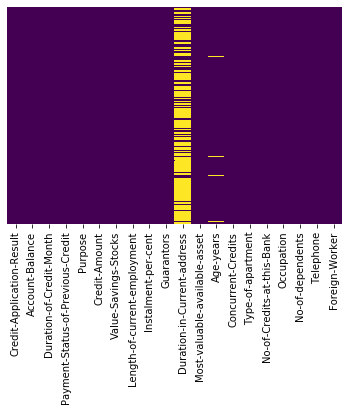

In [3]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [4]:
del train['Duration-in-Current-address'] 

In [5]:
train.isnull().sum()

Credit-Application-Result             0
Account-Balance                       0
Duration-of-Credit-Month              0
Payment-Status-of-Previous-Credit     0
Purpose                               0
Credit-Amount                         0
Value-Savings-Stocks                  0
Length-of-current-employment          0
Instalment-per-cent                   0
Guarantors                            0
Most-valuable-available-asset         0
Age-years                            12
Concurrent-Credits                    0
Type-of-apartment                     0
No-of-Credits-at-this-Bank            0
Occupation                            0
No-of-dependents                      0
Telephone                             0
Foreign-Worker                        0
dtype: int64

Nessa área queremos limpar os dados. 

Abaixo valores referente a média, mediana e a moda. 

A média equivale a 35,63 anos. A mediana equivale a 33 anos e a moda equivale a 26,5 anos. 

In [6]:
train['Age-years'].mean()


35.63729508196721

In [7]:
train['Age-years'].median()

33.0

In [8]:
train['Age-years'].mode()

0    26.0
1    27.0
dtype: float64

In [9]:
train.describe()

,Duration-of-Credit-Month,Credit-Amount,Instalment-per-cent,Most-valuable-available-asset,Age-years,Type-of-apartment,Occupation,No-of-dependents,Telephone,Foreign-Worker
count,500.00000,500.000000,500.000000,500.000000,488.000000,500.000000,500.0,500.00000,500.000000,500.000000
mean,21.43400,3199.980000,3.010000,2.360000,35.637295,1.928000,1.0,1.14600,1.400000,1.038000
std,12.30742,2831.386861,1.113724,1.064268,11.501522,0.539814,0.0,0.35346,0.490389,0.191388
min,4.00000,276.000000,1.000000,1.000000,19.000000,1.000000,1.0,1.00000,1.000000,1.000000
25%,12.00000,1357.250000,2.000000,1.000000,27.000000,2.000000,1.0,1.00000,1.000000,1.000000
50%,18.00000,2236.500000,3.000000,3.000000,33.000000,2.000000,1.0,1.00000,1.000000,1.000000
75%,24.00000,3941.500000,4.000000,3.000000,42.000000,2.000000,1.0,1.00000,2.000000,1.000000
max,60.00000,18424.000000,4.000000,4.000000,75.000000,3.000000,1.0,2.00000,2.000000,2.000000


Quanto mais próximo forem os valores da média, mediana e moda, mais distribuido será o conjunto dos dados. Nesse caso como a 
média é superior a mediana, então vamos utilizar a mediana para imputar esses valores vazios por dois motivos:
Idade não tem numeros quebrados, são números inteiros, logo se descarta imputar valores faltantes com a média. E segundo se a média é superior a mediana, então devemos utilizar a mediana, para diminuir a diferença entre as duas. 

In [10]:
train['Age-years'].fillna(train['Age-years'].median(), inplace=True)

In [11]:
train.isnull().sum()

Credit-Application-Result            0
Account-Balance                      0
Duration-of-Credit-Month             0
Payment-Status-of-Previous-Credit    0
Purpose                              0
Credit-Amount                        0
Value-Savings-Stocks                 0
Length-of-current-employment         0
Instalment-per-cent                  0
Guarantors                           0
Most-valuable-available-asset        0
Age-years                            0
Concurrent-Credits                   0
Type-of-apartment                    0
No-of-Credits-at-this-Bank           0
Occupation                           0
No-of-dependents                     0
Telephone                            0
Foreign-Worker                       0
dtype: int64

In [12]:
#Gosto de usar o info, para saber quais dados terei que transformar em variáveis numéricas para o modelo. 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
Credit-Application-Result            500 non-null object
Account-Balance                      500 non-null object
Duration-of-Credit-Month             500 non-null int64
Payment-Status-of-Previous-Credit    500 non-null object
Purpose                              500 non-null object
Credit-Amount                        500 non-null int64
Value-Savings-Stocks                 500 non-null object
Length-of-current-employment         500 non-null object
Instalment-per-cent                  500 non-null int64
Guarantors                           500 non-null object
Most-valuable-available-asset        500 non-null int64
Age-years                            500 non-null float64
Concurrent-Credits                   500 non-null object
Type-of-apartment                    500 non-null int64
No-of-Credits-at-this-Bank           500 non-null object
Occupation                           500 non

In [13]:
train.Purpose = train.Purpose.astype('category')
train.Guarantors = train.Guarantors.astype('category') 

In [14]:
train['Credit-Application-Result'].value_counts()

Creditworthy        358
Non-Creditworthy    142
Name: Credit-Application-Result, dtype: int64

In [15]:
#Variável Binária
train['Account-Balance'].value_counts()


No Account      262
Some Balance    238
Name: Account-Balance, dtype: int64

In [16]:
train['Payment-Status-of-Previous-Credit'].value_counts()

Paid Up                       260
No Problems (in this bank)    204
Some Problems                  36
Name: Payment-Status-of-Previous-Credit, dtype: int64

In [17]:
train['Purpose'].value_counts()

Home Related    355
Used car         83
New car          47
Other            15
Name: Purpose, dtype: int64

In [18]:
train['Value-Savings-Stocks'].value_counts()

None          298
£100-£1000    154
< £100         48
Name: Value-Savings-Stocks, dtype: int64

In [19]:
train['Length-of-current-employment'].value_counts()

< 1yr      279
4-7 yrs    124
1-4 yrs     97
Name: Length-of-current-employment, dtype: int64

In [20]:
train['No-of-Credits-at-this-Bank'].value_counts()

1              320
More than 1    180
Name: No-of-Credits-at-this-Bank, dtype: int64

Aqui gosto de utilizar o método info para mostrar quais variáveis devo transformar. Nesse caso todos os objetos. 

# Transformação das variáveis categóricas em numéricas

Foi utilizado dois métodos para a transformação. O método get_dummies e o label encoder. Para variáveis binárias foi utilizado o método get_dummies, transformando aquela variável categórica em 0 ou 1. E utilizamos o drop_first para excluir umas das dummies, evitando assim um problema de multi-colonariedade. 
Já para o label encoder, foi utilizado esse método para colunas acima de 3 variáveis ou seja variáveis não binárias.

In [21]:
Account_balance = pd.get_dummies(train['Account-Balance'],drop_first=True)  # drop_first=True > Para evitar a multi-colinaridade
Num_emprestimo = pd.get_dummies(train['No-of-Credits-at-this-Bank'],drop_first=True)
Tempo_trabalho = pd.get_dummies(train['Length-of-current-employment'],drop_first=True)
Resultado = pd.get_dummies(train['Credit-Application-Result'],drop_first=True)
sem_credito_banco = pd.get_dummies(train['No-of-Credits-at-this-Bank'],drop_first=True)

In [22]:
train.drop(['Account-Balance','No-of-Credits-at-this-Bank','Length-of-current-employment','Credit-Application-Result','No-of-Credits-at-this-Bank'],axis=1,inplace=True)

In [23]:
train = pd.concat([train,Account_balance,Num_emprestimo,Tempo_trabalho,Resultado,sem_credito_banco],axis=1)

In [24]:
from sklearn.preprocessing import LabelEncoder


In [25]:
pspc = train['Payment-Status-of-Previous-Credit']
set(pspc)
label_encoder = LabelEncoder()
PSPC = label_encoder.fit_transform(pspc)
PSPC
train['Payment-Status-of-Previous-Credit'] = PSPC

In [26]:
#Purpose é igual ao objetivo
#Home_Related=355, Used_car=83, NewCar=47, Other=15
purpose = train['Purpose']
set(purpose)
label_encoder = LabelEncoder()
Purpose = label_encoder.fit_transform(purpose)
Purpose
train['Purpose'] = Purpose

In [27]:
#Poupança
#None=298 100-1000 libras=154 <100=48
vss = train['Value-Savings-Stocks']
set(vss)
label_encoder = LabelEncoder()
VSS = label_encoder.fit_transform(vss)
VSS
train['Value-Savings-Stocks'] = VSS

In [28]:
del train['Concurrent-Credits']
del train['Guarantors']
del train['Occupation']



Depois de rodar os scripts, temos uma base de dados totalmente convertida para variáveis numéricas. Agora sim, vamos iniciar o processo de aprendizagem de máquina, e analisar, quais dos 4 tipos de modelo é o melhor para esse conjunto de dados. 

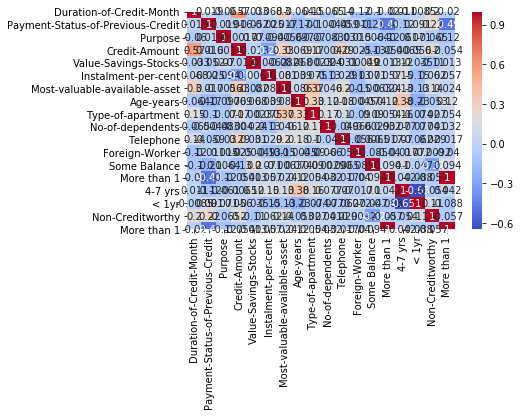

In [29]:
sns.heatmap(train.corr(),cmap='coolwarm',annot=True)
plt.rcParams['figure.figsize'] = (15.5, 10.5)

Conseguimos identificar que não existe nenhuma variavel com alta correlação em "Non-Crefitworthy", que é a nossa variável de classificação que estamos querendo prever. 

Porém existem variáveis que possuem uma correlação média, como é o caso do tempo do empréstimo com o valor do empréstimo. Vamos tirar a prova no gráfico abaixo, referente a essa correlação. 


<Figure size 792x504 with 0 Axes>

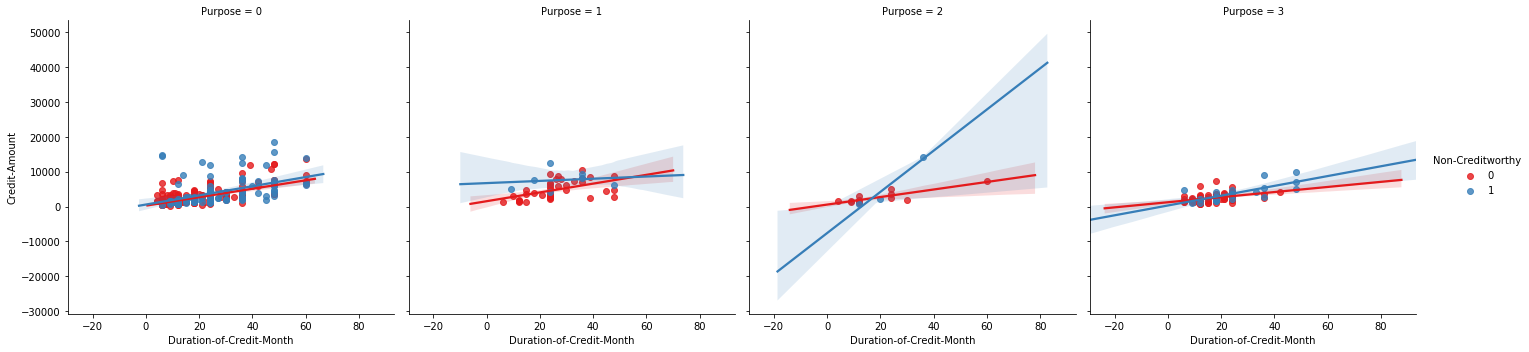

In [30]:
plt.figure(figsize=(11,7))
sns.lmplot(y='Credit-Amount',x='Duration-of-Credit-Month',data=train,hue='Non-Creditworthy',
           col='Purpose',palette='Set1')

# Training and Predicting Model Logistic

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Non-Creditworthy',axis=1), 
                                                    train['Non-Creditworthy'], test_size=0.30, 
                                                    random_state=101)

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/home/felipe/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
logmodel.score(X_train, y_train)

0.8085714285714286

In [36]:
pred1 = logmodel.predict(X_test)

# Avaliação Modelo Logístico


In [37]:
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report,confusion_matrix

In [38]:
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

           0       0.73      0.85      0.79       103
           1       0.48      0.30      0.37        47

    accuracy                           0.68       150
   macro avg       0.61      0.58      0.58       150
weighted avg       0.65      0.68      0.65       150



In [39]:
print(confusion_matrix(y_test,pred1))

[[88 15]
 [33 14]]


# Model KNN

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
scaler = StandardScaler()

In [42]:
scaler.fit(train.drop('Non-Creditworthy',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [43]:
scaled_features = scaler.transform(train.drop('Non-Creditworthy',axis=1))

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,train['Non-Creditworthy'],
                                                    test_size=0.30, random_state=101)

In [46]:
from sklearn.neighbors import KNeighborsClassifier

In [47]:
knn = KNeighborsClassifier(n_neighbors=3)

In [48]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [49]:
knn.score(X_train, y_train)

0.8828571428571429

# Previsão e Avaliação Modelo KNN


In [50]:
pred2 = knn.predict(X_test)

In [51]:
from sklearn.metrics import classification_report,confusion_matrix

In [52]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       0.72      0.91      0.81       103
           1       0.55      0.23      0.33        47

    accuracy                           0.70       150
   macro avg       0.64      0.57      0.57       150
weighted avg       0.67      0.70      0.66       150



In [53]:
print(confusion_matrix(y_test,pred2))

[[94  9]
 [36 11]]


# Escolhendo o melhor valor de K

In [54]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

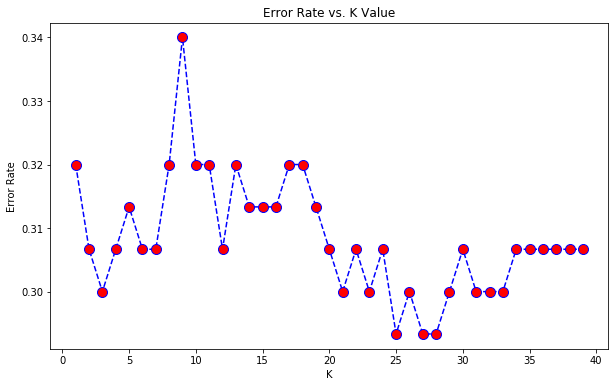

In [55]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Com esse método conseguimos ter uma melhora significativa aumento o k de 1 para 6. A priori é o melhor modelo possível de KNN. 


# Training a Decision Tree Model

In [56]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Non-Creditworthy',axis=1), 
                                                    train['Non-Creditworthy'], test_size=0.30, 
                                                    random_state=101)

In [57]:
from sklearn.tree import DecisionTreeClassifier

In [58]:
dtree = DecisionTreeClassifier()

In [59]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

# Previsões e avaliação da árvore de decisão

In [60]:
pred3 = dtree.predict(X_test)

In [61]:
from sklearn.metrics import classification_report,confusion_matrix

In [62]:
print(classification_report(y_test,pred3))

              precision    recall  f1-score   support

           0       0.71      0.77      0.74       103
           1       0.38      0.32      0.35        47

    accuracy                           0.63       150
   macro avg       0.55      0.54      0.54       150
weighted avg       0.61      0.63      0.62       150



In [63]:
print(confusion_matrix(y_test,pred3))

[[79 24]
 [32 15]]


# Treinando o modelo de florestas aleatórias

In [64]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Non-Creditworthy',axis=1), 
                                                    train['Non-Creditworthy'], test_size=0.30, 
                                                    random_state=101)

In [65]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
rfc = RandomForestClassifier(n_estimators=600)

In [67]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

# Previsões e Avaliação

In [68]:
pred4 = rfc.predict(X_test)

In [69]:
from sklearn.metrics import classification_report,confusion_matrix

In [70]:
print(classification_report(y_test,pred4))

              precision    recall  f1-score   support

           0       0.73      0.95      0.82       103
           1       0.67      0.21      0.32        47

    accuracy                           0.72       150
   macro avg       0.70      0.58      0.57       150
weighted avg       0.71      0.72      0.67       150



In [71]:
print(confusion_matrix(y_test,pred4))

[[98  5]
 [37 10]]


# Qual modelo escolher?

In [72]:
#Modelo Logaritmo
print('Logaritmo')
print(classification_report(y_test,pred1))
print(confusion_matrix(y_test,pred1))
print('\n')

#KNN
print('KNN')
print(classification_report(y_test,pred2))
print(confusion_matrix(y_test,pred2))
print('\n')

#Arvore de decisão
print('Arvore de decisão')
print(classification_report(y_test,pred3))
print(confusion_matrix(y_test,pred3))
print('\n')

#Floresta aleatória
print('Floresta Aleatória')
print(classification_report(y_test,pred4))
print(confusion_matrix(y_test,pred4))
print('\n')


Logaritmo
              precision    recall  f1-score   support

           0       0.73      0.85      0.79       103
           1       0.48      0.30      0.37        47

    accuracy                           0.68       150
   macro avg       0.61      0.58      0.58       150
weighted avg       0.65      0.68      0.65       150

[[88 15]
 [33 14]]


KNN
              precision    recall  f1-score   support

           0       0.72      0.91      0.81       103
           1       0.55      0.23      0.33        47

    accuracy                           0.70       150
   macro avg       0.64      0.57      0.57       150
weighted avg       0.67      0.70      0.66       150

[[94  9]
 [36 11]]


Arvore de decisão
              precision    recall  f1-score   support

           0       0.71      0.77      0.74       103
           1       0.38      0.32      0.35        47

    accuracy                           0.63       150
   macro avg       0.55      0.54      0.54       150


## Feature Importance

## Árvore de Decisão

In [73]:
dtree.feature_importances_

array([0.169731  , 0.07296138, 0.02284749, 0.20295327, 0.06416747,
       0.01947145, 0.05052589, 0.17510499, 0.0345925 , 0.        ,
       0.01017659, 0.        , 0.12120213, 0.00722394, 0.00481596,
       0.03652039, 0.00770554])

In [74]:
feature_imp = pd.Series(dtree.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

Credit-Amount                        0.202953
Age-years                            0.175105
Duration-of-Credit-Month             0.169731
Some Balance                         0.121202
Payment-Status-of-Previous-Credit    0.072961
Value-Savings-Stocks                 0.064167
Most-valuable-available-asset        0.050526
< 1yr                                0.036520
Type-of-apartment                    0.034592
Purpose                              0.022847
Instalment-per-cent                  0.019471
Telephone                            0.010177
More than 1                          0.007706
More than 1                          0.007224
4-7 yrs                              0.004816
No-of-dependents                     0.000000
Foreign-Worker                       0.000000
dtype: float64

In [75]:
def visualiza_features_importantes(features_lista):
    %matplotlib inline

    plt.figure(figsize=(16,8))
    sns.barplot(x=features_lista, y=features_lista.index)

    plt.xlabel('Feature Importance Score')
    plt.ylabel('Features')
    plt.title("Visualizing Important Features")
    plt.show()

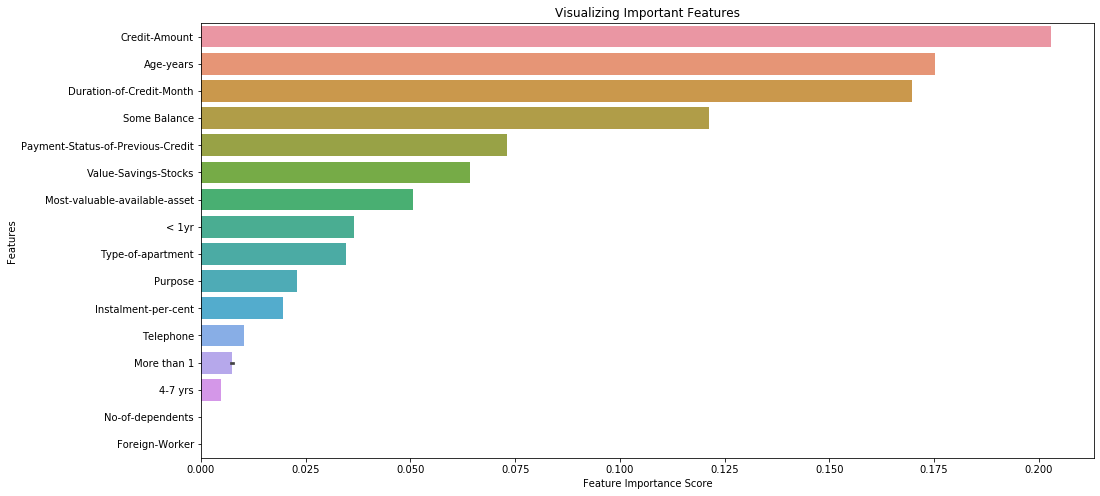

In [76]:
visualiza_features_importantes(feature_imp)

In [77]:
X = train[['Value-Savings-Stocks', 'Most-valuable-available-asset', 'Payment-Status-of-Previous-Credit','Some Balance', 'Age-years','Credit-Amount','Duration-of-Credit-Month']]
y = train['Non-Creditworthy']

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=48, test_size=0.30)

In [80]:
dtree1 = DecisionTreeClassifier()

In [81]:
from sklearn.metrics import classification_report,confusion_matrix

In [82]:
dtree1.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [83]:
pred31 = dtree1.predict(X_test)

In [84]:
print(classification_report(y_test,pred31))
print('\n')
print(confusion_matrix(y_test,pred31))

              precision    recall  f1-score   support

           0       0.84      0.73      0.78       113
           1       0.40      0.57      0.47        37

    accuracy                           0.69       150
   macro avg       0.62      0.65      0.62       150
weighted avg       0.73      0.69      0.70       150



[[82 31]
 [16 21]]


## Floresta Aleatória

In [85]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Non-Creditworthy',axis=1), 
                                                    train['Non-Creditworthy'], test_size=0.30, 
                                                    random_state=101)

In [86]:
from sklearn.ensemble import RandomForestClassifier

In [87]:
rfc = RandomForestClassifier(n_estimators=600)

In [88]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [89]:
rfc.feature_importances_

array([0.1246479 , 0.08285597, 0.03422074, 0.19309241, 0.04090835,
       0.05614249, 0.07595962, 0.12310612, 0.03693581, 0.02596485,
       0.02904228, 0.00787511, 0.09480742, 0.01516589, 0.01694701,
       0.02709936, 0.01522866])

In [90]:
feature_imp = pd.Series(rfc.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

Credit-Amount                        0.193092
Duration-of-Credit-Month             0.124648
Age-years                            0.123106
Some Balance                         0.094807
Payment-Status-of-Previous-Credit    0.082856
Most-valuable-available-asset        0.075960
Instalment-per-cent                  0.056142
Value-Savings-Stocks                 0.040908
Type-of-apartment                    0.036936
Purpose                              0.034221
Telephone                            0.029042
< 1yr                                0.027099
No-of-dependents                     0.025965
4-7 yrs                              0.016947
More than 1                          0.015229
More than 1                          0.015166
Foreign-Worker                       0.007875
dtype: float64

In [91]:
def visualiza_features_importantes(features_lista):
    %matplotlib inline

    plt.figure(figsize=(16,8))
    sns.barplot(x=features_lista, y=features_lista.index)

    plt.xlabel('Feature Importance Score')
    plt.ylabel('Features')
    plt.title("Visualizing Important Features")
    plt.show()

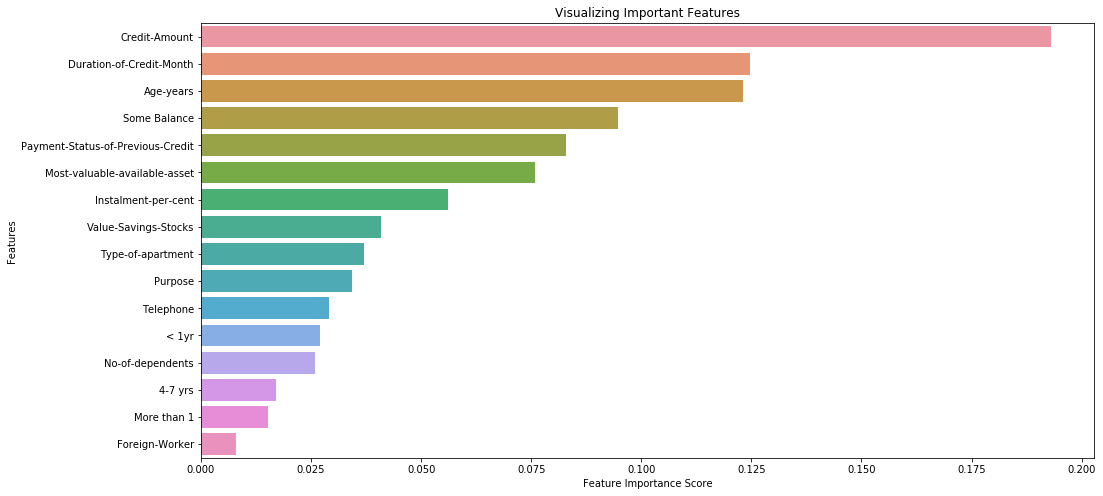

In [92]:
visualiza_features_importantes(feature_imp)

In [93]:
X = train[['Instalment-per-cent', 'Most-valuable-available-asset', 'Payment-Status-of-Previous-Credit', 'Most-valuable-available-asset', 'Payment-Status-of-Previous-Credit', 'Some Balance', 'Age-years', 'Duration-of-Credit-Month', 'Credit-Amount']]
y = train['Non-Creditworthy']

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=48, test_size=0.30)

In [95]:
rfcc = DecisionTreeClassifier()

In [99]:
rfcc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [100]:
pred41 = rfcc.predict(X_test)

In [101]:
print(classification_report(y_test,pred41))
print(confusion_matrix(y_test,pred41))

              precision    recall  f1-score   support

           0       0.83      0.76      0.80       113
           1       0.43      0.54      0.48        37

    accuracy                           0.71       150
   macro avg       0.63      0.65      0.64       150
weighted avg       0.73      0.71      0.72       150

[[86 27]
 [17 20]]


O modelo a ser escolhido é o Arvore de Decisão, pois tem os melhores indicadores, pois foi o modelo que melhor perfomou. ALém do mais, a matriz de confusão apenas constata o que o resultado do modelo nos revela. 

## Treinando o modelo com 100% do arquivo. E depois usar o predict no arquivo a ser previsto. 


In [102]:
X = train[['Instalment-per-cent', 'Most-valuable-available-asset', 'Payment-Status-of-Previous-Credit', 'Most-valuable-available-asset', 'Payment-Status-of-Previous-Credit', 'Some Balance', 'Age-years', 'Duration-of-Credit-Month', 'Credit-Amount']]
y = train['Non-Creditworthy']

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=48, train_size=0.9999)

In [104]:
rfcc = DecisionTreeClassifier()

In [105]:
rfcc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [106]:
pred42 = rfcc.predict(X_train)

In [107]:
res = pd.read_excel('4.customers-to-score.xlsx', sheet_name="Sheet1")
res



,Account-Balance,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit,Purpose,Credit-Amount,Value-Savings-Stocks,Length-of-current-employment,Instalment-per-cent,Guarantors,Duration-in-Current-address,Most-valuable-available-asset,Age-years,Concurrent-Credits,Type-of-apartment,No-of-Credits-at-this-Bank,Occupation,No-of-dependents,Telephone,Foreign-Worker
0,No Account,9,No Problems (in this bank),Home Related,2799,None,< 1yr,2,None,2,1,36,Other Banks/Depts,1,More than 1,1,2,1,1
1,No Account,12,No Problems (in this bank),Home Related,2122,None,< 1yr,3,None,2,1,39,Other Banks/Depts,1,More than 1,1,2,1,2
2,No Account,24,Paid Up,Home Related,3758,£100-£1000,< 1yr,1,None,4,4,23,Other Banks/Depts,1,1,1,1,1,1
3,No Account,11,No Problems (in this bank),Home Related,3905,None,< 1yr,2,None,2,1,36,Other Banks/Depts,1,More than 1,1,2,1,1
4,No Account,6,No Problems (in this bank),Home Related,1957,None,1-4 yrs,1,None,4,3,31,Other Banks/Depts,2,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,No Account,18,No Problems (in this bank),Home Related,3966,None,4-7 yrs,1,None,4,1,33,Other Banks/Depts,1,More than 1,1,1,2,1
496,No Account,12,Some Problems,Home Related,6199,None,< 1yr,4,None,2,2,28,Other Banks/Depts,1,More than 1,1,1,2,1
497,No Account,24,Paid Up,Home Related,1987,None,< 1yr,2,None,4,1,21,Other Banks/Depts,1,1,1,2,1,1
498,No Account,24,Paid Up,Home Related,2303,None,4-7 yrs,4,Yes,1,1,45,Other Banks/Depts,2,1,1,1,1,1


In [108]:
res = pd.DataFrame()
res['Non-Creditworthy'] = pred42
res.to_csv('submission3.csv',index=False)


In [109]:
a = pd.read_csv('submission3.csv')
a

,Non-Creditworthy
0,0
1,0
2,1
3,0
4,0
...,...
494,0
495,0
496,0
497,0


In [110]:
a['Non-Creditworthy'].value_counts()

0    358
1    141
Name: Non-Creditworthy, dtype: int64

No nosso modelo 358 pessoas estavam aptos a receber o crédito, enquanto 141 tiveram seus pedidos negados. 